In [1]:
import matplotlib.pyplot as plt
import timeit
#import random
#import time
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rain = pd.read_csv("Data/Rain.csv")

In [3]:
display(rain)
display(rain.info())
display(rain.describe())

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       5/18/2009        Hobart      5.1     14.3       0.0          1.8   
1        7/3/2009    Launceston      1.1     14.5       0.4          NaN   
2       2/18/2010   Williamtown     19.7     26.2       0.0          7.2   
3        3/4/2010  PerthAirport     16.6     28.0       0.0          9.0   
4        9/9/2010     GoldCoast     14.6     25.3       0.0          NaN   
...           ...           ...      ...      ...       ...          ...   
36876   6/14/2011         Perth     10.1     14.2       7.4          3.4   
36877   9/24/2010  PerthAirport      6.3     26.0       0.0          5.0   
36878    5/6/2011        Darwin     20.5     31.7       0.0          7.0   
36879  10/12/2010         Perth      6.3     23.3       0.0          5.2   
36880  12/22/2010     Nuriootpa      9.4     26.3       0.0          4.8   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0           8.9          NW           30.0        WSW  ...        65.0   
1           NaN         SSW           50.0          E  ...        99.0   
2           7.2         SSE           41.0        SSE  ...        48.0   
3          11.3          SW           54.0        SSE  ...        50.0   
4           NaN         NNW           43.0        WNW  ...        64.0   
...         ...         ...            ...        ...  ...         ...   
36876       0.0         NNE           46.0        NNE  ...        84.0   
36877      10.6           W           37.0          N  ...        38.0   
36878      11.1           E           37.0          E  ...        54.0   
36879      11.6         SSW           39.0          E  ...        50.0   
36880      12.2          SE           35.0        ENE  ...        50.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0             47.0       1023.1       1022.2       1.0       1.0      9.1   
1             46.0       1001.5       1002.4       NaN       NaN      1.3   
2             50.0       1020.9       1021.9       6.0       4.0     22.7   
3             41.0       1018.3       1014.9       6.0       1.0     20.0   
4             67.0       1020.3       1015.0       NaN       NaN     22.2   
...            ...          ...          ...       ...       ...      ...   
36876         81.0       1016.2       1014.5       7.0       8.0     10.4   
36877         45.0       1024.2       1021.5       1.0       1.0     18.4   
36878         39.0       1012.6       1009.0       2.0       5.0     25.7   
36879         41.0       1023.9       1019.9       0.0       1.0     16.4   
36880         28.0       1017.5       1014.7       4.0       4.0     16.7   

       Temp3pm  RainToday  RainTomorrow  
0         13.3         No            No  
1         13.7         No            No  
2         24.4         No            No  
3         26.1         No            No  
4         22.6         No            No  
...        ...        ...           ...  
36876     13.9        Yes           Yes  
36877     23.5         No            No  
36878     30.5         No            No  
36879     20.9         No            No  
36880     25.3         No            No  

[36881 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

None

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  36543.000000  36639.000000  36255.000000  24035.000000  23317.000000   
mean      12.235966     22.939491      2.554823      5.189544      7.544688   
std        6.389832      6.988266      9.081329      3.765427      3.833809   
min       -8.500000     -3.100000      0.000000      0.000000      0.000000   
25%        7.600000     17.800000      0.000000      2.600000      4.700000   
50%       12.100000     22.300000      0.000000      4.600000      8.400000   
75%       17.000000     27.900000      0.800000      7.000000     10.600000   
max       30.500000     48.100000    371.000000     81.200000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   33520.000000  36219.000000  36235.000000  36311.000000  36370.000000   
mean       40.390573     14.217427     18.874928     69.146953     52.307369   
std        13.550613      8.997003      8.791849     18.300754     20.317082   
min         7.000000      0.000000      0.000000      2.000000      1.000000   
25%        31.000000      7.000000     13.000000     58.000000     38.000000   
50%        39.000000     13.000000     19.000000     70.000000     53.000000   
75%        48.000000     20.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  33309.000000  33329.000000  24381.000000  23899.000000  36394.000000   
mean    1017.283152   1014.967769      4.331488      4.462321     16.905688   
std        7.177877      7.077594      2.848750      2.663067      6.428328   
min      982.900000    980.200000      0.000000      0.000000     -5.900000   
25%     1012.500000   1010.100000      1.000000      2.000000     12.300000   
50%     1017.300000   1015.000000      5.000000      5.000000     16.600000   
75%     1022.200000   1019.800000      7.000000      7.000000     21.500000   
max     1041.000000   1039.600000      9.000000      8.000000     37.700000   

            Temp3pm  
count  36437.000000  
mean      21.485808  
std        6.820848  
min       -5.100000  
25%       16.500000  
50%       20.900000  
75%       26.200000  
max       46.100000

## Exploring missing values

In [4]:
display(rain.isna().sum()/len(rain)*100)

Date              0.000000
Location          0.000000
MinTemp           0.916461
MaxTemp           0.656164
Rainfall          1.697351
Evaporation      34.830943
Sunshine         36.777745
WindGustDir       9.132073
WindGustSpeed     9.113093
WindDir9am        7.616388
WindDir3pm        2.608389
WindSpeed9am      1.794962
WindSpeed3pm      1.751579
Humidity9am       1.545511
Humidity3pm       1.385537
Pressure9am       9.685204
Pressure3pm       9.630975
Cloud9am         33.892790
Cloud3pm         35.199696
Temp9am           1.320463
Temp3pm           1.203872
RainToday         1.697351
RainTomorrow      1.681082
dtype: float64

In [5]:
rain.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   5/18/2009        Hobart      5.1     14.3       0.0          1.8   
1    7/3/2009    Launceston      1.1     14.5       0.4          NaN   
2   2/18/2010   Williamtown     19.7     26.2       0.0          7.2   
3    3/4/2010  PerthAirport     16.6     28.0       0.0          9.0   
4    9/9/2010     GoldCoast     14.6     25.3       0.0          NaN   
5   9/28/2011       Mildura     15.7     27.3       0.0         11.2   
6  10/13/2011     Nuriootpa      9.8     23.9       0.0          4.4   
7    4/8/2010     NorahHead     18.7     27.6       3.0          NaN   
8  10/19/2009    Townsville     23.6     30.1       0.0         11.4   
9   2/23/2010  MountGambier      8.5     22.9       1.4          4.2   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       8.9          NW           30.0        WSW  ...        65.0   
1       NaN         SSW           50.0          E  ...        99.0   
2       7.2         SSE           41.0        SSE  ...        48.0   
3      11.3          SW           54.0        SSE  ...        50.0   
4       NaN         NNW           43.0        WNW  ...        64.0   
5       5.6           N           65.0        ENE  ...        60.0   
6      10.5          SE           35.0        ENE  ...        53.0   
7       NaN         SSE           41.0        WNW  ...        78.0   
8      10.8           E           57.0        ESE  ...        53.0   
9      12.5         SSW           41.0        SSE  ...        62.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         47.0       1023.1       1022.2       1.0       1.0      9.1   
1         46.0       1001.5       1002.4       NaN       NaN      1.3   
2         50.0       1020.9       1021.9       6.0       4.0     22.7   
3         41.0       1018.3       1014.9       6.0       1.0     20.0   
4         67.0       1020.3       1015.0       NaN       NaN     22.2   
5         86.0       1002.0        995.5       8.0       7.0     18.1   
6         29.0       1017.8       1013.9       3.0       4.0     15.5   
7         64.0       1013.2       1011.0       NaN       NaN     22.4   
8         48.0       1020.9       1018.0       4.0       2.0     27.4   
9         41.0       1023.1       1022.1       1.0       2.0     16.4   

   Temp3pm  RainToday  RainTomorrow  
0     13.3         No            No  
1     13.7         No            No  
2     24.4         No            No  
3     26.1         No            No  
4     22.6         No            No  
5     18.5         No           Yes  
6     23.0         No            No  
7     24.0        Yes            No  
8     27.9         No            No  
9     22.1        Yes            No  

[10 rows x 23 columns]

In [6]:
rain_nans = rain.loc[(rain["Evaporation"].isnull()==True) & (rain["Sunshine"].isnull()==True)]


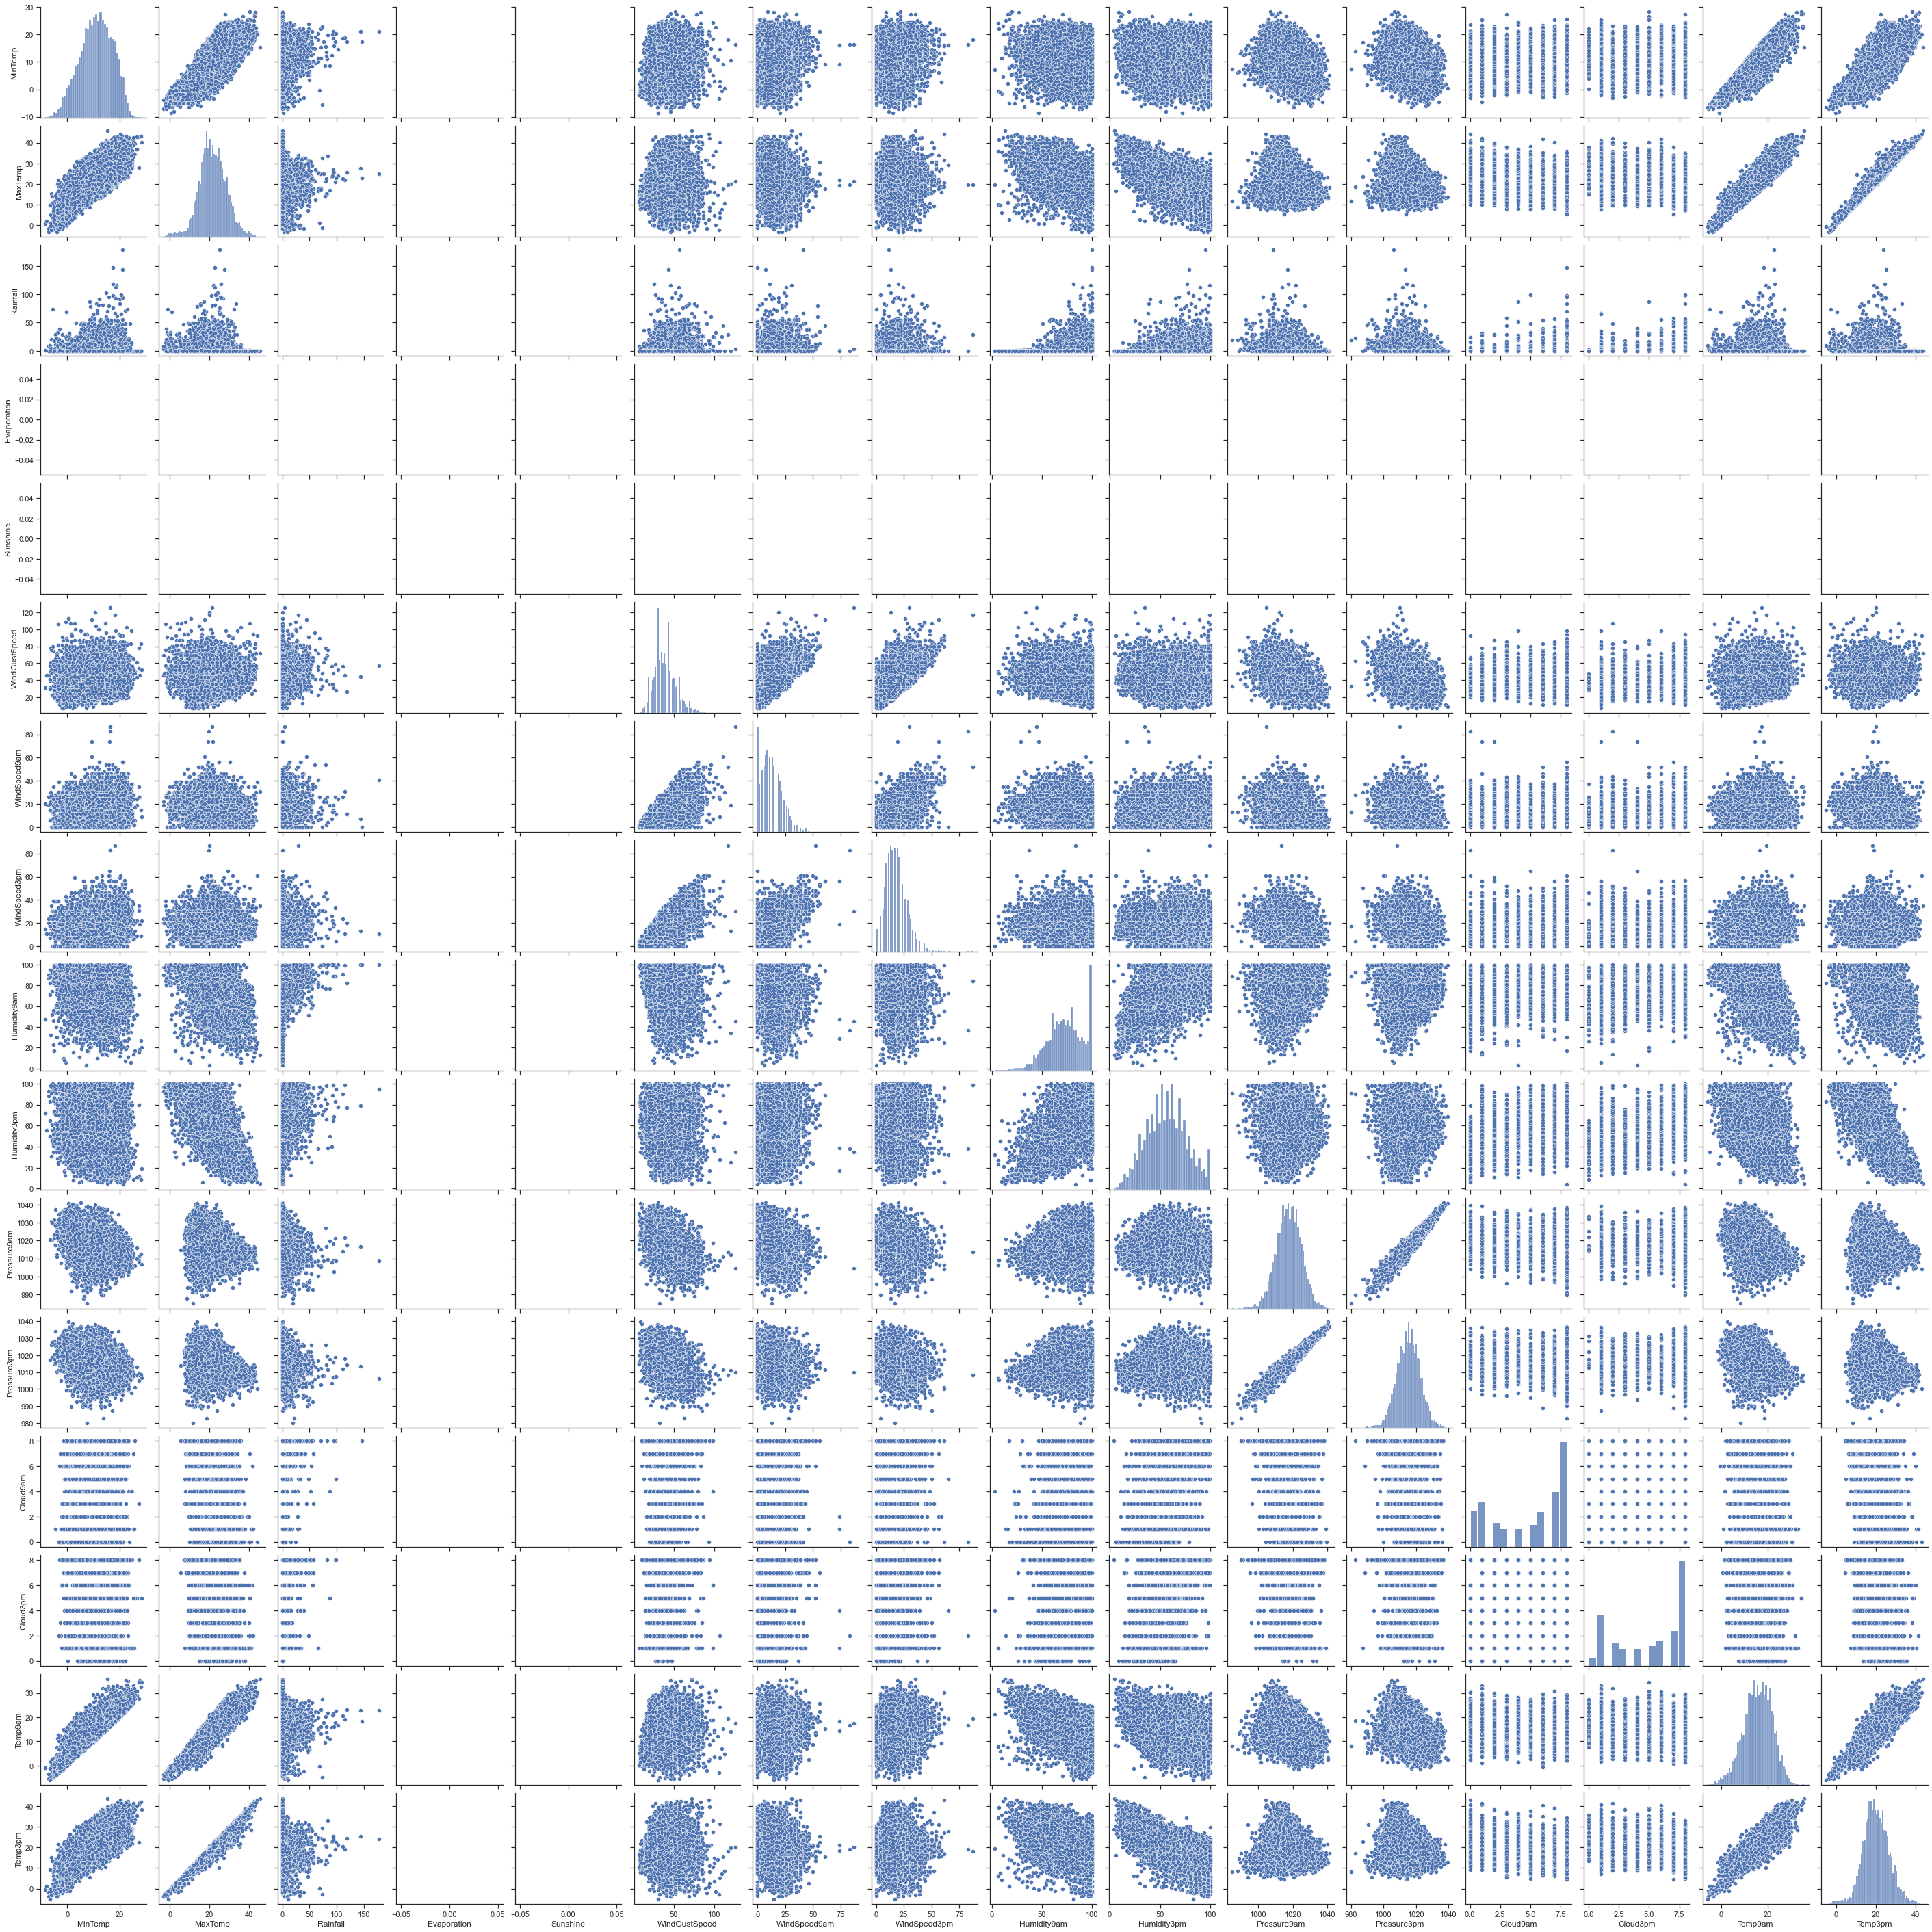

In [7]:
sns.set(style="ticks")
sns.pairplot(rain_nans)

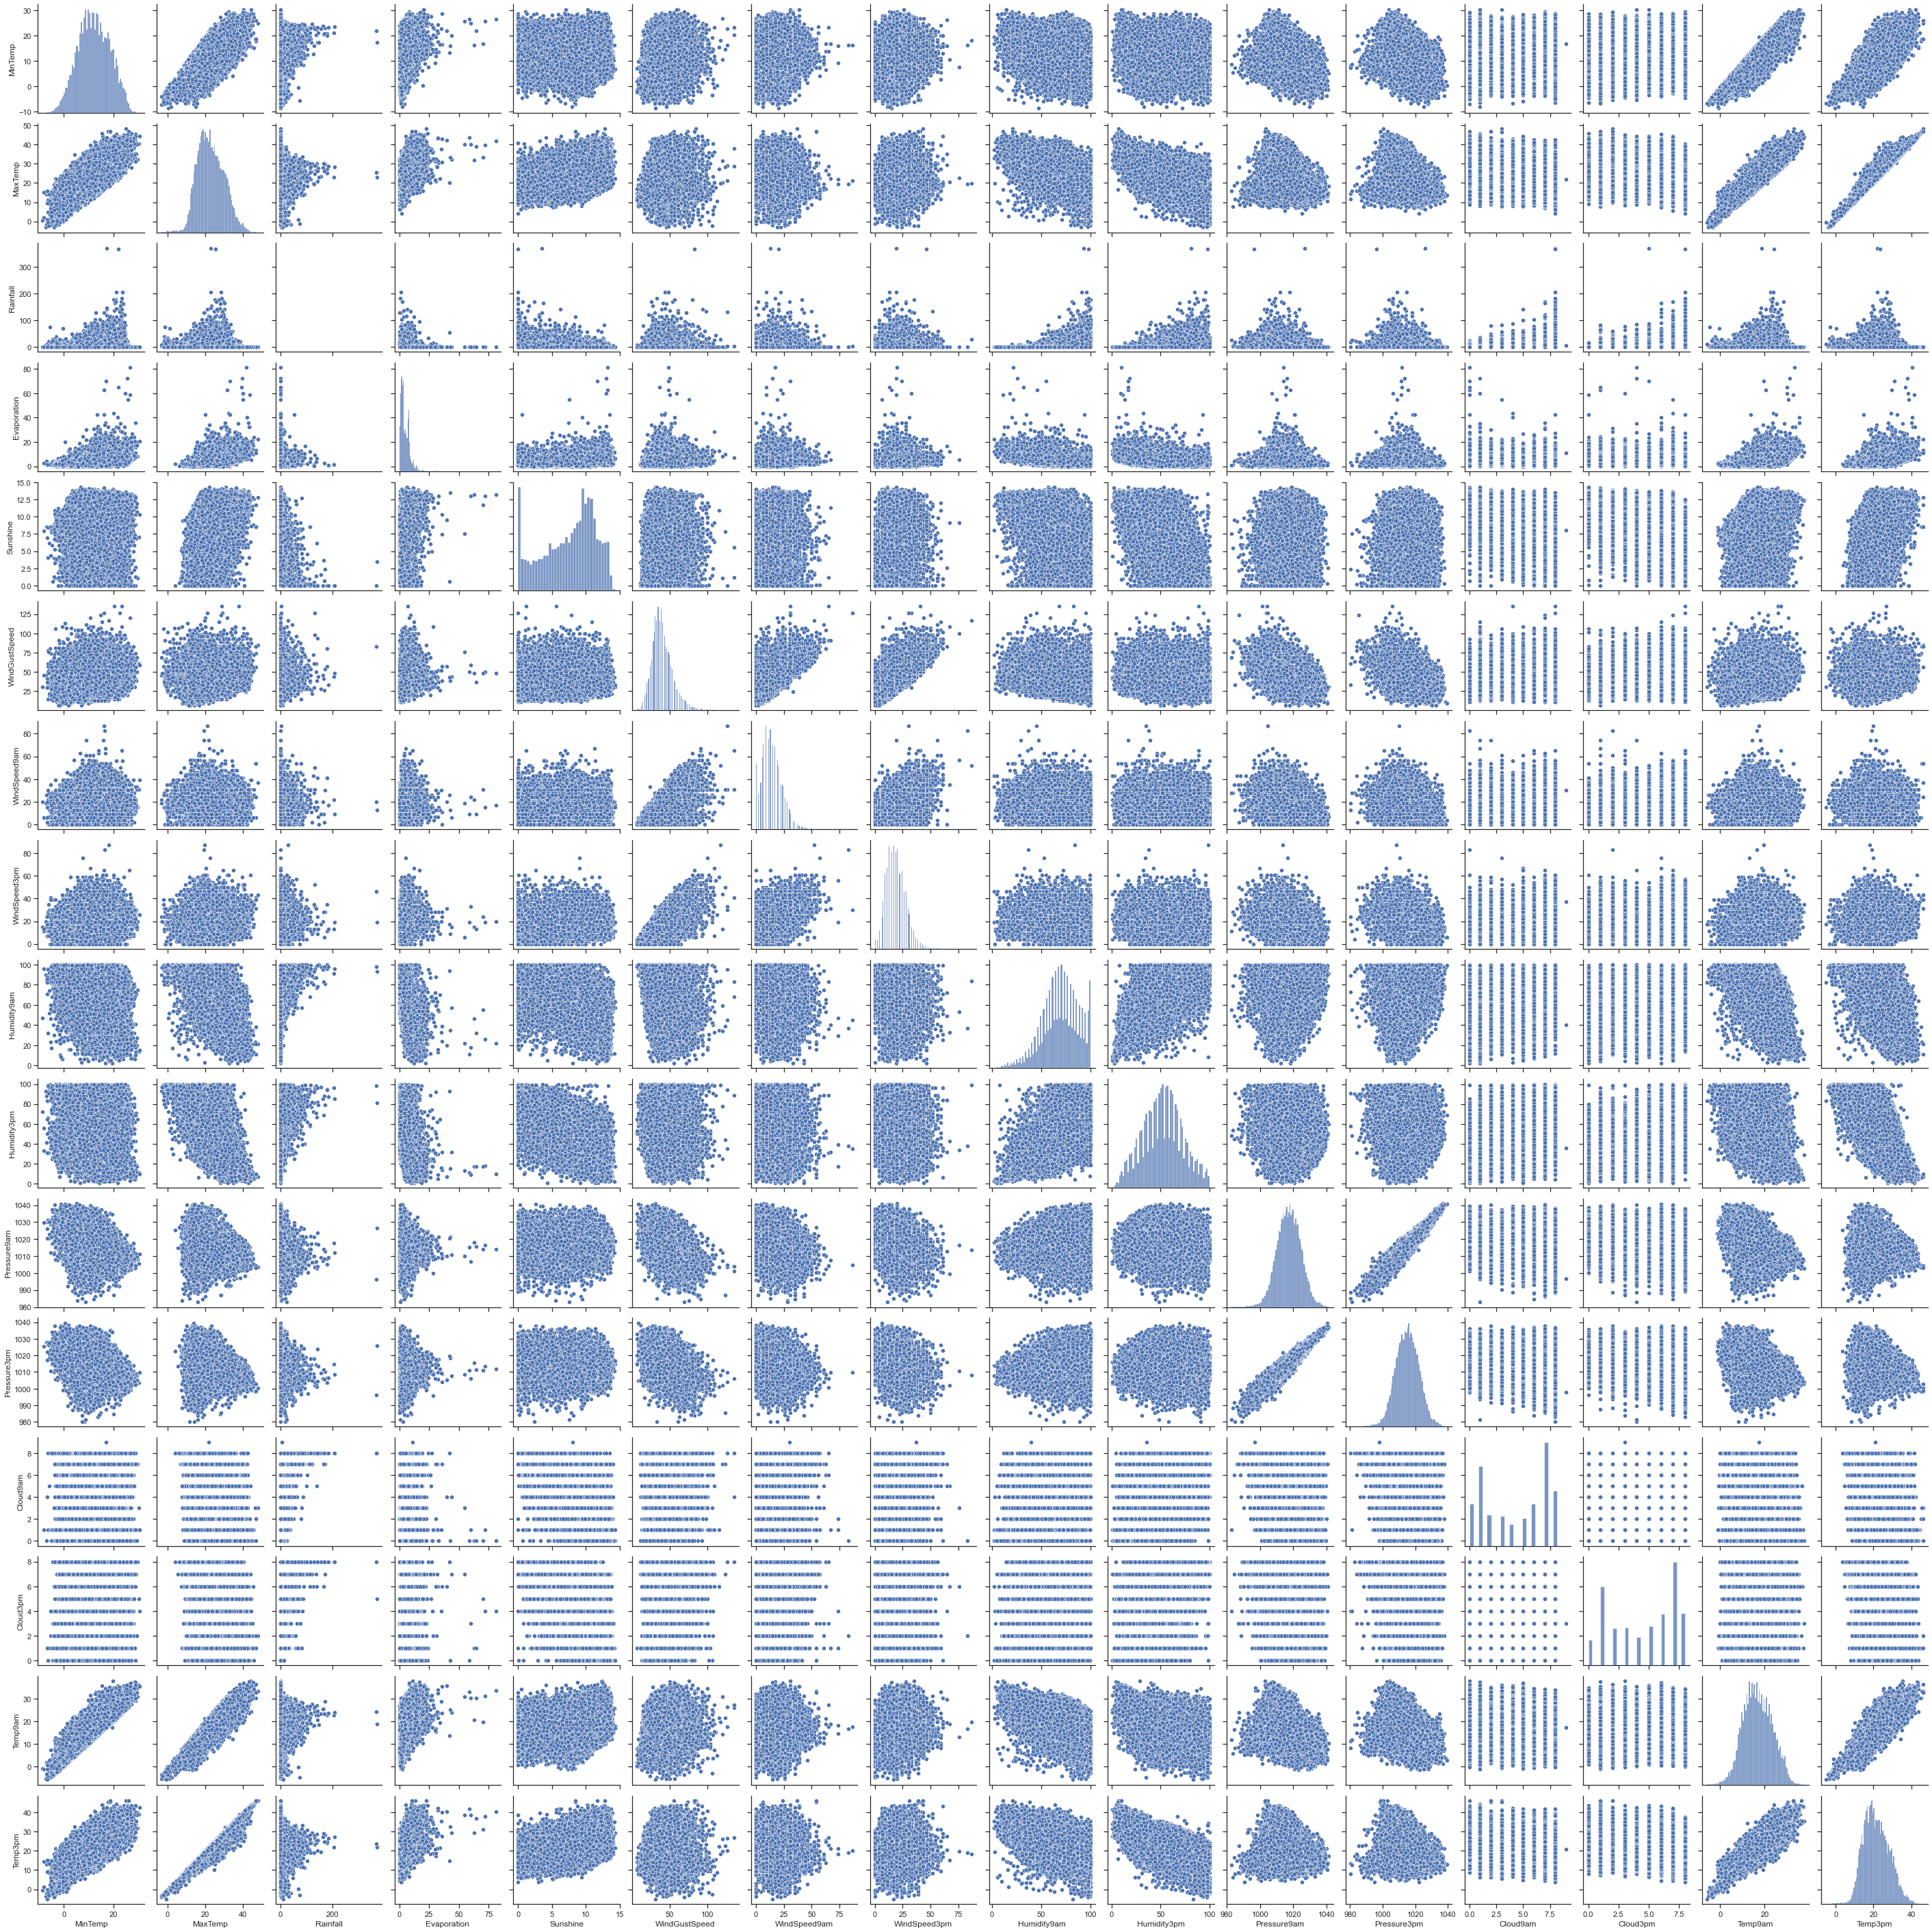

In [8]:
sns.pairplot(rain)

<br>

### Exploring "Evaporation" and "Sunshine" in detail. Question: do they add any meaningful value?

<AxesSubplot:xlabel='Evaporation', ylabel='RainToday'>

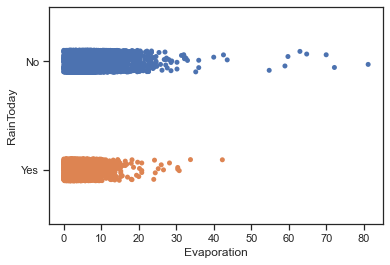

In [9]:
sns.stripplot(x=rain.Evaporation, y=rain.RainToday)

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

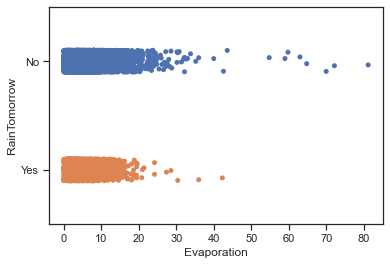

In [10]:
sns.stripplot(x=rain.Evaporation, y=rain.RainTomorrow)

<AxesSubplot:xlabel='Sunshine', ylabel='RainToday'>

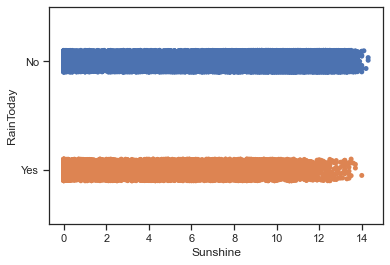

In [11]:
sns.stripplot(x=rain.Sunshine, y=rain.RainToday)

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

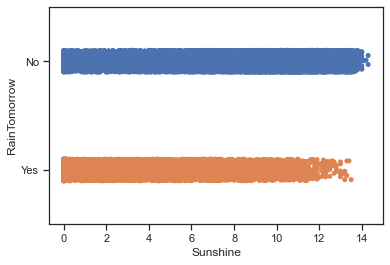

In [12]:
sns.stripplot(x=rain.Sunshine, y=rain.RainTomorrow)

__Sunshine__: it looks like sunshine is no real indicator for "RainTomorrow".

__Evaporation__: how many rows are there that are clearly indicating a "No" for "RainTomorrow"?

In [13]:
display(len(rain.loc[(rain["Evaporation"]>20)]))
display(len(rain.loc[(rain["Evaporation"]>20) & (rain["RainTomorrow"]=="Yes")]))

112

10

#### Decision: drop Sunshine and Evaporation column!

In [14]:
rain_1 = rain.copy().drop(columns=["Sunshine", "Evaporation"])

<br>

### Exploring "Cloud3pm" and "Cloud9pm" in detail. Question: do they add any meaningful value?

<AxesSubplot:xlabel='Cloud9am', ylabel='Count'>

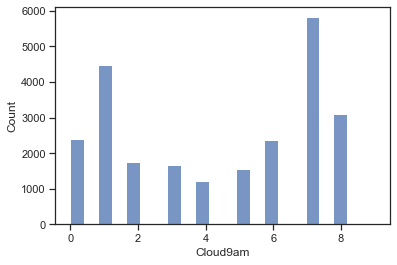

In [37]:
sns.histplot(rain_1.Cloud9am)

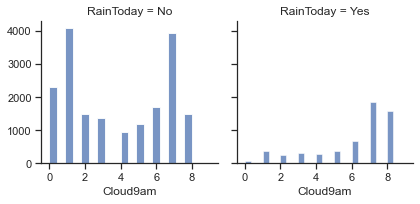

In [34]:
plot = sns.FacetGrid(rain_1, col="RainToday")
plot.map(sns.histplot, "Cloud9am")

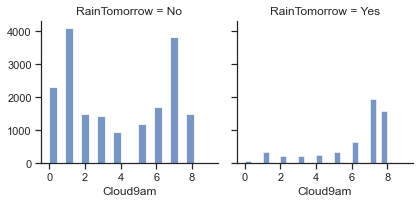

In [30]:
plot = sns.FacetGrid(rain_1, col="RainTomorrow")
plot.map(sns.histplot, "Cloud9am")

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

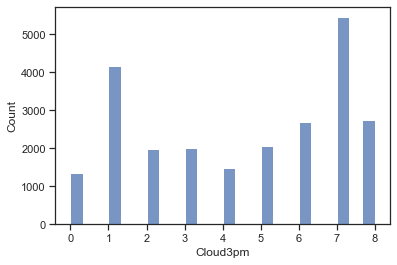

In [38]:
sns.histplot(rain_1.Cloud3pm)

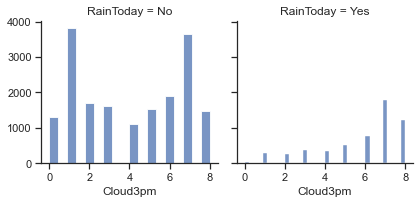

In [32]:
plot = sns.FacetGrid(rain_1, col="RainToday")
plot.map(sns.histplot, "Cloud3pm")

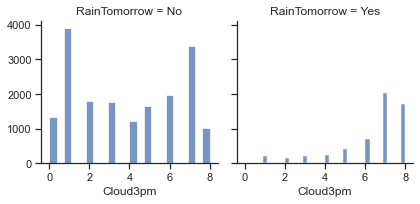

In [33]:
plot = sns.FacetGrid(rain_1, col="RainTomorrow")
plot.map(sns.histplot, "Cloud3pm")

<AxesSubplot:xlabel='Cloud9am', ylabel='RainToday'>

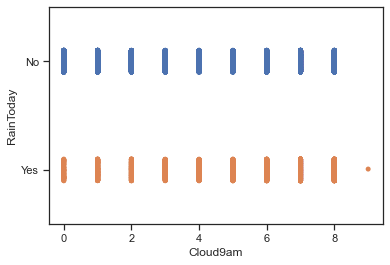

In [18]:
sns.stripplot(x=rain_1.Cloud9am, y=rain_1.RainToday)

<AxesSubplot:xlabel='Cloud9am', ylabel='RainTomorrow'>

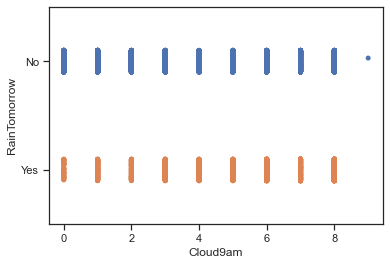

In [19]:
sns.stripplot(x=rain_1.Cloud9am, y=rain_1.RainTomorrow)

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainToday'>

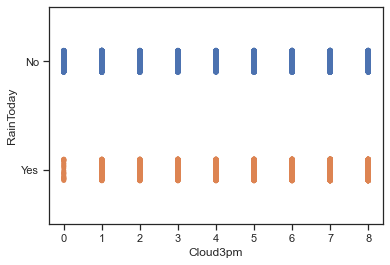

In [20]:
sns.stripplot(x=rain_1.Cloud3pm, y=rain_1.RainToday)

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainTomorrow'>

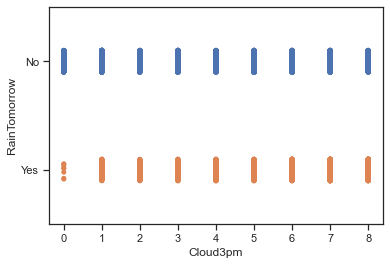

In [21]:
sns.stripplot(x=rain_1.Cloud3pm, y=rain_1.RainTomorrow)

In [17]:
#plot = sns.FacetGrid(rain_1)
#plot.map(sns.stripplot(x="Cloud9am", y="RainToday"))